### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [3]:
df = pd.read_csv("Boston_HPP.csv")

In [4]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploratory Data Analysis

In [5]:
df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<Axes: >

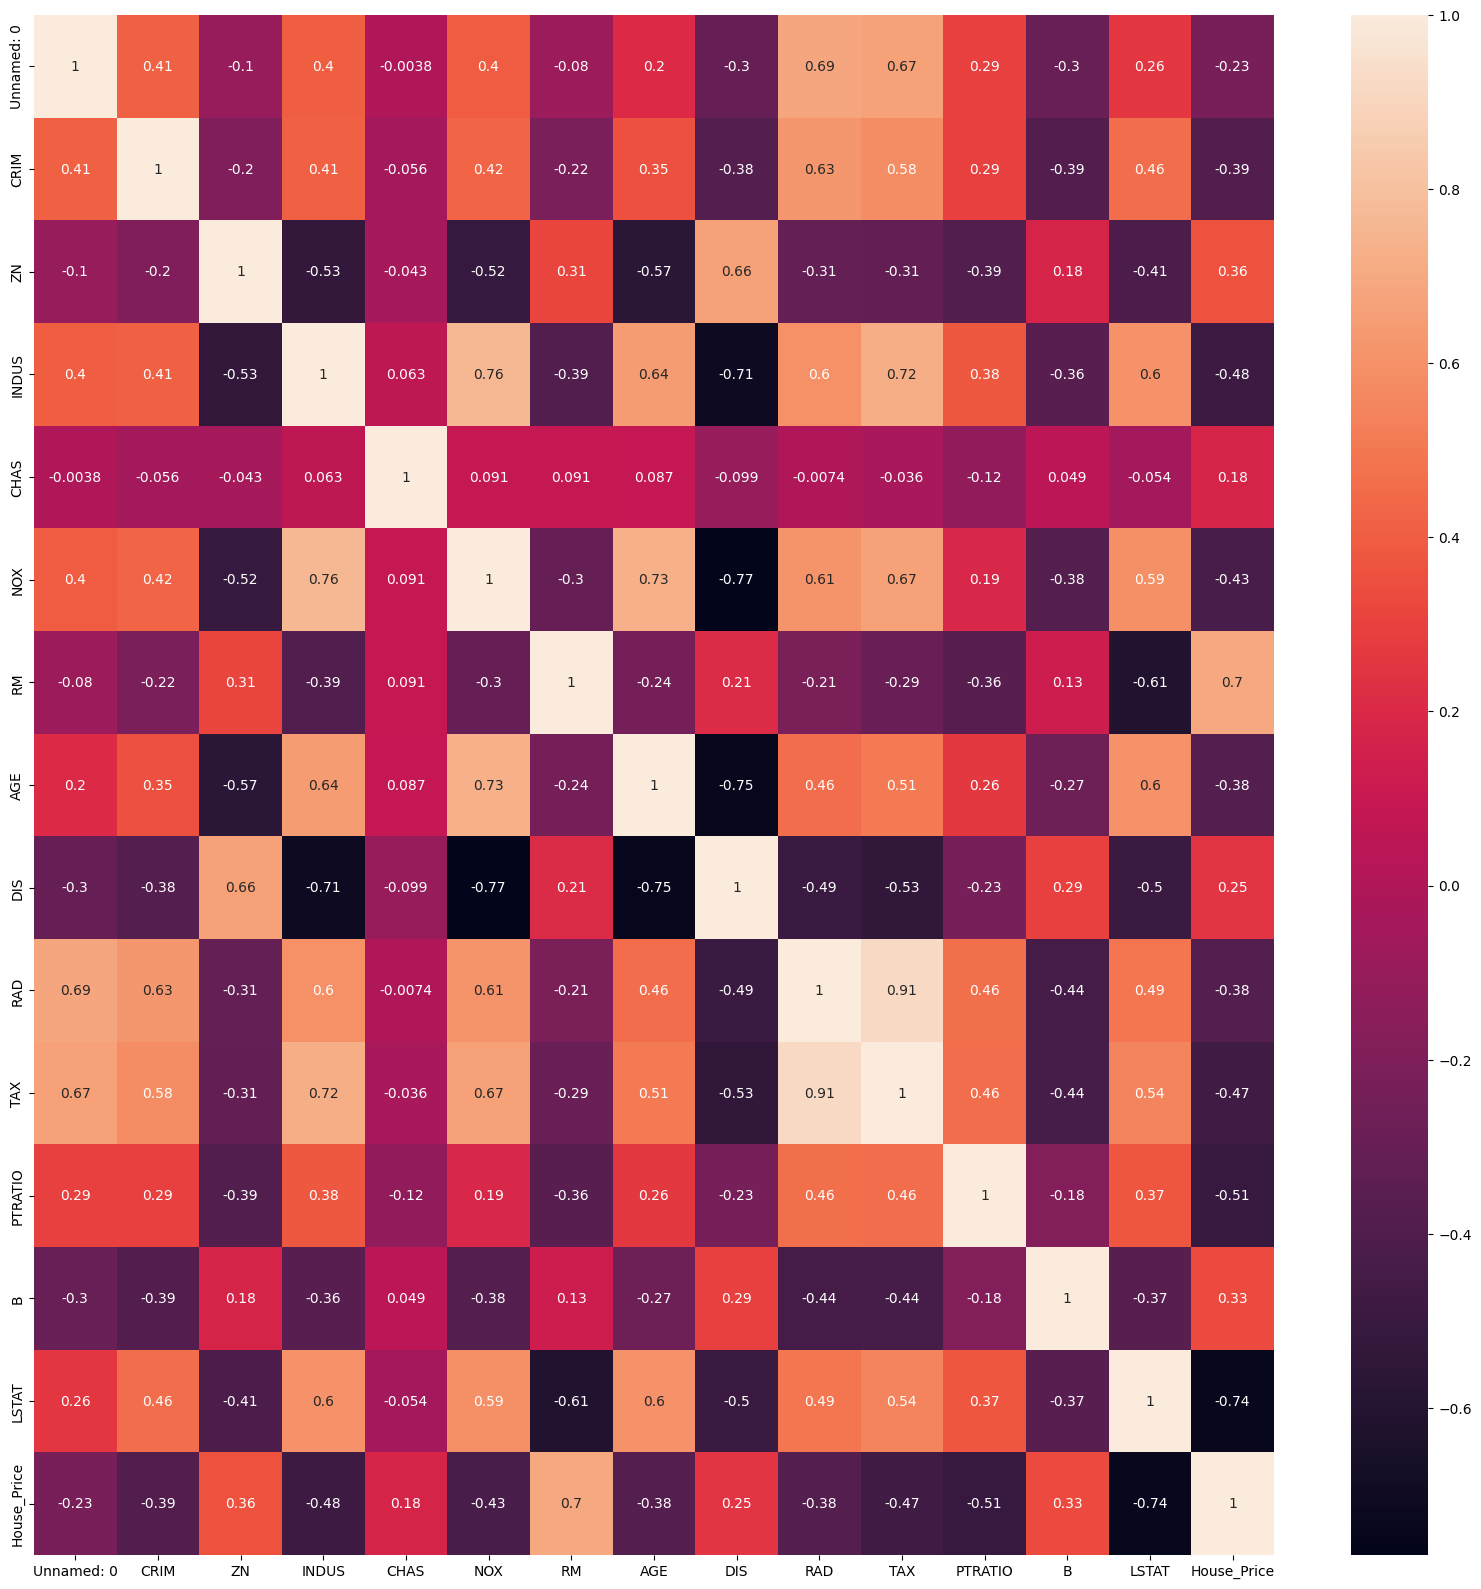

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<Axes: >

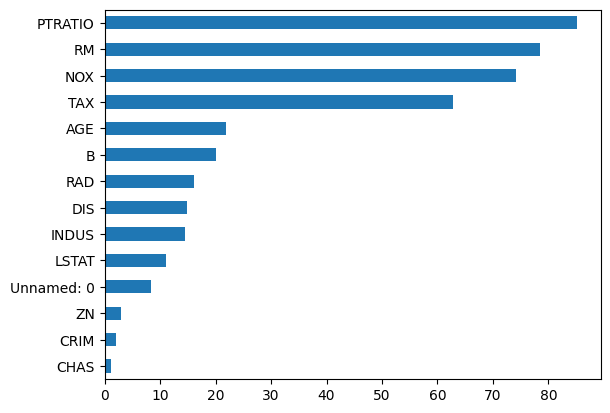

In [8]:
x = df.drop("House_Price", axis = 1)

vif_list  = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index = x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

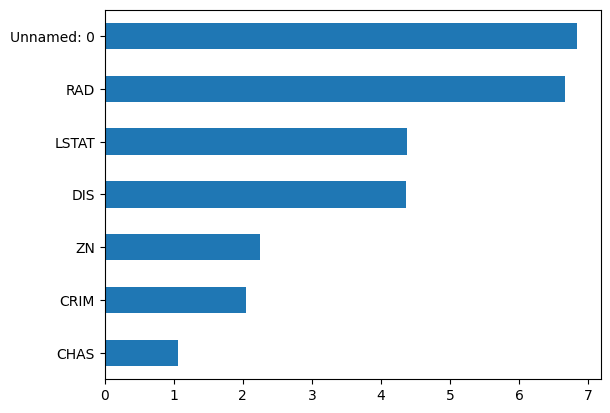

In [9]:
x = df.drop(["House_Price","PTRATIO","NOX","TAX","RM","AGE","B","INDUS"], axis = 1)

vif_list  = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index = x.columns)
s1.sort_values().plot(kind = "barh")

### Feature Engineering

### Initial Feature Selection

### Train Model

In [10]:
x = df.drop("House_Price",axis = 1)
y = df["House_Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [11]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation with Test Data

In [12]:
y_pred = lr_model.predict(x_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 25.918502273040403
MAE: 3.3710937770102998
R2: 0.661856474490204


### Model Evaluation with Train Data

In [14]:
y_pred_train = lr_model.predict(x_train)

In [15]:
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 20.665838968904982
MAE: 3.2214556120333975
R2: 0.7618376434779611


In [16]:
lr_model.coef_

array([-1.35755498e-03, -7.45520050e-02,  3.93941811e-02,  1.04678543e-02,
        2.97006483e+00, -1.61739137e+01,  4.32408797e+00, -8.16604783e-03,
       -1.47269657e+00,  2.78767648e-01, -1.14957132e-02, -9.57383750e-01,
        1.00999312e-02, -4.97879353e-01])

<Axes: >

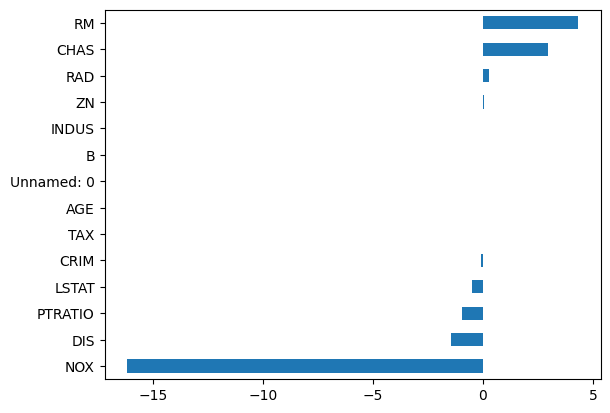

In [17]:
series_1 = pd.Series(lr_model.coef_, index=x.columns)
series_1.sort_values().plot(kind = "barh")

### Ridge Regression

In [18]:
rr_model = Ridge()
rr_model.fit(x_train,y_train)

Ridge()

#### Model Evaluation with Test Data

In [19]:
y_pred = rr_model.predict(x_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 26.42219937633187
MAE: 3.3489742291438507
R2: 0.6552850332664102


#### Model Evaluation with Train Data

In [21]:
y_pred_train = rr_model.predict(x_train)

In [22]:
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 20.83906076848858
MAE: 3.2291143871414576
R2: 0.7598413581080861


<Axes: >

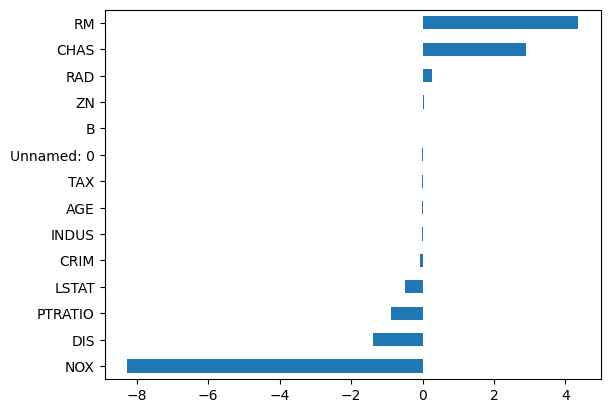

In [23]:
series_2 = pd.Series(rr_model.coef_, index=x.columns)
series_2.sort_values().plot(kind = "barh")

<Axes: >

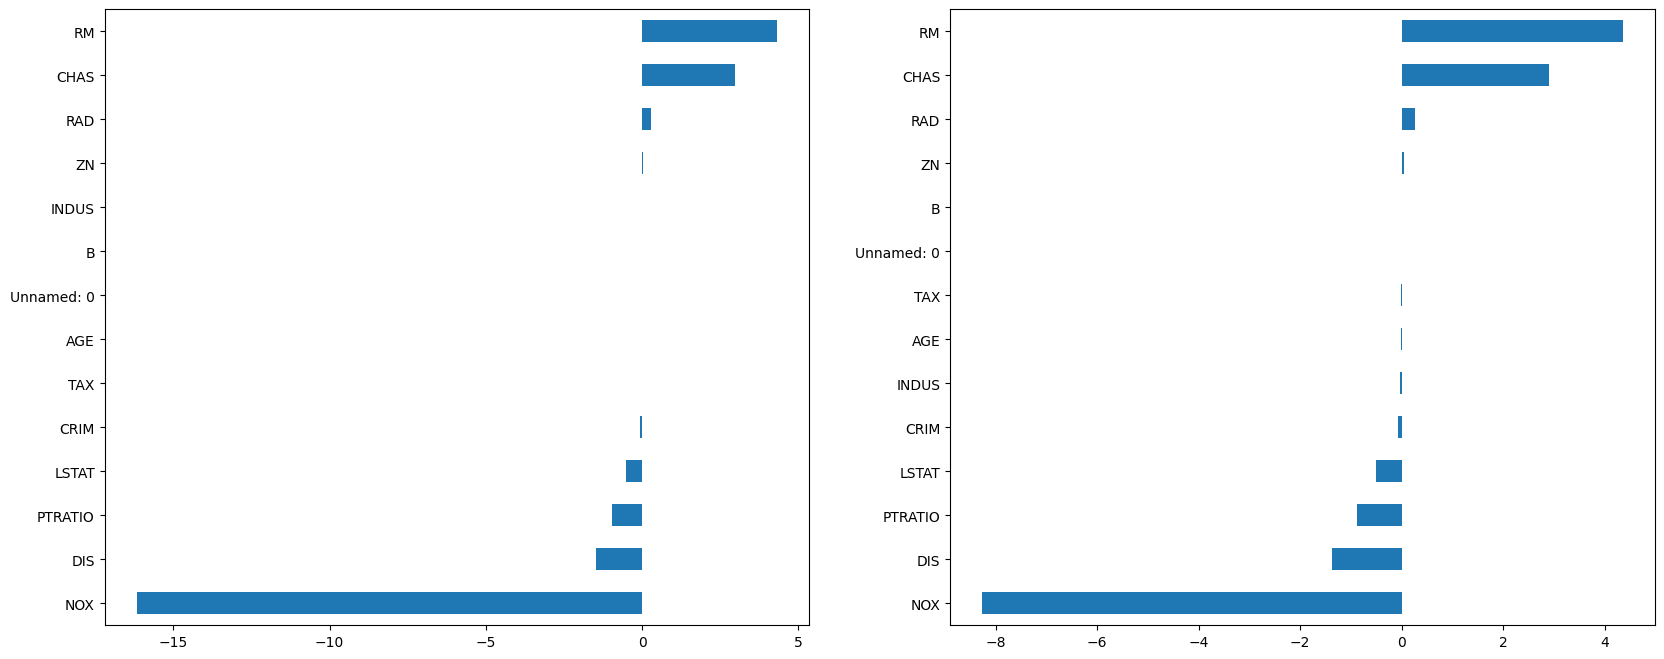

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
series_1.sort_values().plot(kind = "barh")
plt.subplot(1,2,2)
series_2.sort_values().plot(kind = "barh")


### Lasso Regression

In [25]:
ls_model = Lasso()

In [26]:
ls_model.fit(x_train, y_train)

Lasso()

#### Model Evaluation on Test Data

In [27]:
y_pred = ls_model.predict(x_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 27.55249191176424
MAE: 3.6321041906183646
R2: 0.640538768271536


#### Model Evaluation on Train Data

In [29]:
y_pred_train = ls_model.predict(x_train)

In [30]:
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 25.661562789197962
MAE: 3.558345162551861
R2: 0.7042646913532256


<Axes: >

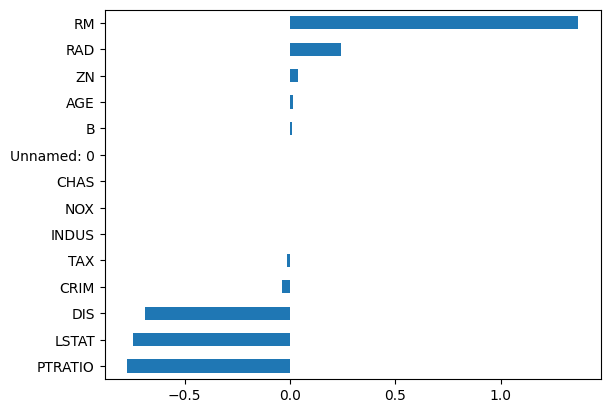

In [31]:
series_3 = pd.Series(ls_model.coef_, index=x.columns)
series_3.sort_values().plot(kind = "barh")

<Axes: >

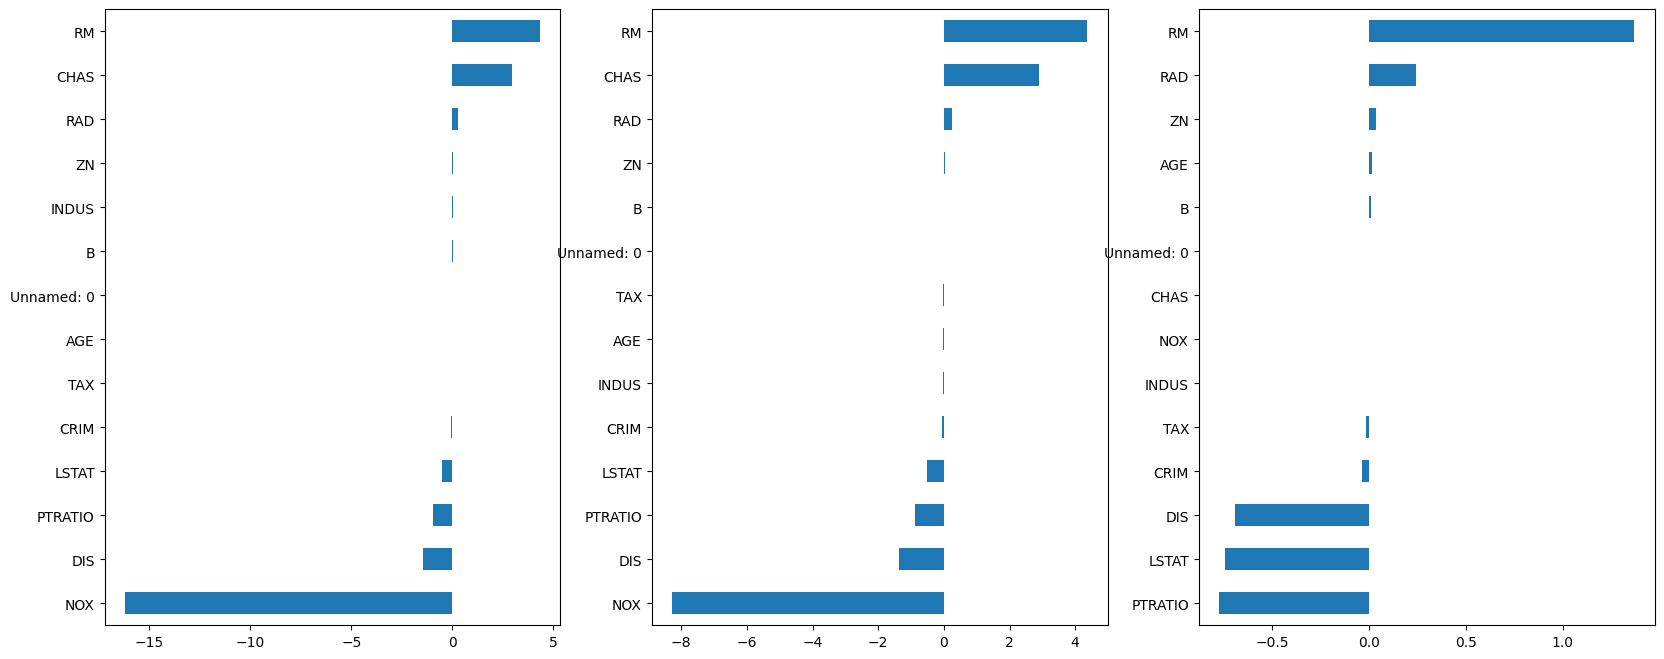

In [32]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
series_1.sort_values().plot(kind = "barh")
plt.subplot(1,3,2)
series_2.sort_values().plot(kind = "barh")
plt.subplot(1,3,3)
series_3.sort_values().plot(kind = "barh")

In [33]:
coef_df = pd.DataFrame({"Linear Regression":series_1, "Ridge":series_2, "Lasso":series_3})
coef_df

,Linear Regression,Ridge,Lasso
Unnamed: 0,-0.001358,-0.001699,0.000658
CRIM,-0.074552,-0.068086,-0.035761
ZN,0.039394,0.040886,0.038390
INDUS,0.010468,-0.025179,-0.000000
CHAS,2.970065,2.894845,0.000000
NOX,-16.173914,-8.270034,-0.000000
RM,4.324088,4.354712,1.367537
AGE,-0.008166,-0.016664,0.016198
DIS,-1.472697,-1.375209,-0.689577
RAD,0.278768,0.261453,0.242561


In [34]:
# "PTRATIO","NOX","TAX","RM","AGE","B","INDUS"

In [35]:
# from sklearn.linear_model import ElasticNet

In [36]:
# en_model = ElasticNet()

# Hyperparameter Tuning

In [37]:
rr_model = Ridge()

In [38]:
1. GridSearchCV
2. RandomizedSearchCV

SyntaxError: invalid syntax (893703508.py, line 1)

### Ridge Regression with GridSearchCV

In [39]:
rr_model = Ridge()

In [40]:
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_rr_model = GridSearchCV(rr_model,param_grid,cv = 5)
gscv_rr_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [41]:
gscv_rr_model.best_estimator_

Ridge(alpha=np.float64(0.4))

In [42]:
rr_model = Ridge(alpha=0.01)

rr_model.fit(x_train, y_train)
y_pred = rr_model.predict(x_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 25.92403672889936
MAE: 3.3700196543259233
R2: 0.6617842696846866


In [44]:
y_pred_train = rr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 20.665903836987077
MAE: 3.2211011373539895
R2: 0.7618368959092164


<Axes: >

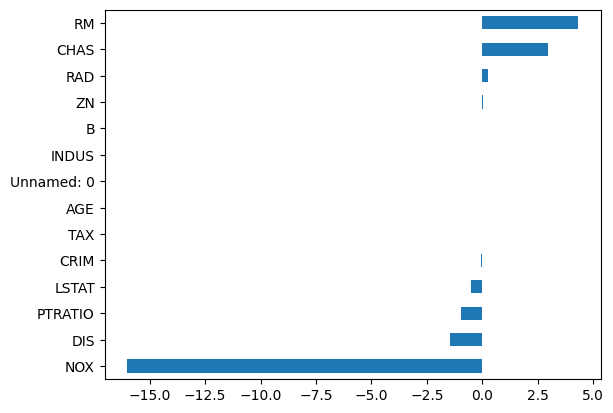

In [45]:
series_4 = pd.Series(rr_model.coef_, index = x.columns)
series_4.sort_values().plot(kind = "barh")

### Ridge Regression with RandomizedSearchCV

In [46]:
rr_model = Ridge()

param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rr_model = RandomizedSearchCV(rr_model,param_grid,cv = 5)
rscv_rr_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [47]:
rscv_rr_model.best_estimator_

Ridge(alpha=np.float64(0.36000000000000004))

In [48]:
rr_model = Ridge(alpha=0.38)

rr_model.fit(x_train, y_train)
y_pred = rr_model.predict(x_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 26.140916082502983
MAE: 3.3536252232611057
R2: 0.6589547717273877


In [50]:
y_pred_train = rr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 20.71720612650343
MAE: 3.2201769454929514
R2: 0.7612456654160061


### Lasso Regression with GSCV and RSCV

In [51]:
ls_model = Lasso()

In [52]:
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_ls_model = GridSearchCV(ls_model,param_grid,cv = 5)
gscv_ls_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [53]:
gscv_ls_model.best_estimator_

Lasso(alpha=np.float64(0.01))

In [54]:
ls_model = Lasso(alpha=0.01)

ls_model.fit(x_train, y_train)
y_pred = ls_model.predict(x_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 26.06418626436086
MAE: 3.352824435540367
R2: 0.6599558207442243


In [56]:
y_pred_train = ls_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 20.70433875748515
MAE: 3.218161369188426
R2: 0.7613939547224429


### Elastic Net Regression

In [57]:
en_model = ElasticNet()

NameError: name 'ElasticNet' is not defined

In [58]:
import time
start_time = time.time()
# time.sleep(5)


In [59]:
end_time = time.time()
(end_time-start_time)/60

0.01941070556640625

In [60]:
start_time = time.time()

param_grid = {"alpha":np.arange(0.01,3,0.01),"l1_ratio":np.arange(0.01,3,0.01)}
gscv_en_model = GridSearchCV(en_model,param_grid,cv = 5)
gscv_en_model.fit(x_train,y_train)

end_time = time.time()
print("Time taken to run GSCV with two parameters:", (end_time-start_time)/60)
gscv_en_model.best_estimator_


NameError: name 'en_model' is not defined

# User Input

In [ ]:
x.columns

In [ ]:
x.head()

In [ ]:
crim = 0.00632
zn = 18
indus = 2.31
chas = 00.0
nox = 0.538
rm = 6.575
age = 65.2
dis = 4.09
rad = 1
tax = 296
ptratio = 15.3
b = 396
lstat = 4.98

array = np.array([crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat])

predicted_price = np.round(lr_model.predict([array])[0],2)
print("The predicted house price is:", predicted_price,"K $")

In [ ]:
y